Computes the streamfunction for the nondivergent horizontal velocity

In [1]:
import xarray as xr
import cmocean
from xnemogcm import open_nemo_and_domain_cfg, open_domain_cfg, get_metrics
import xgcm

Load in data using xnemogcm

In [2]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/production/OUTPUTS/'
nemo_files = ['MINT_1d_00700601_00700630_grid_U.nc']

mask_path = ['~/Python/AI4PEX/DINO/mesh_mask_exp16.nc']

In [3]:
# open dataset using xnemogcm
nemo_paths = [directory + f for f in nemo_files]
ds = open_nemo_and_domain_cfg(nemo_files=nemo_paths,
                              domcfg_files=mask_path)

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [19]:
ds

<xarray.Dataset>
Dimensions:              (z_c: 36, axis_nbounds: 2, t: 30, y_f: 3183, x_c: 802,
                          y_c: 3183, x_f: 802, z_f: 36)
Coordinates: (12/20)
    time_instant         (t) object dask.array<chunksize=(1,), meta=np.ndarray>
  * t                    (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
  * x_c                  (x_c) int64 0 1 2 3 4 5 6 ... 796 797 798 799 800 801
  * y_f                  (y_f) float64 0.5 1.5 2.5 ... 3.182e+03 3.182e+03
    gdept_1d             (z_c) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * z_c                  (z_c) int64 0 1 2 3 4 5 6 7 ... 28 29 30 31 32 33 34 35
    ...                   ...
    gdepw_1d             (z_f) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gdept_0              (z_c, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    gdepw_0              (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
  * x_f                  (x_f) float64 0.5 1.5 2.5 3.5 ... 799.5 800.5 801.5
  * z_f                  (z_f) float64 -0.5 0.5 1.5 2.5 ... 31.5 32.5 33.5 34.5
  * y_c                  (y_c) int64 0 1 2 3 4 5 ... 3178 3179 3180 3181 3182
Dimensions without coordinates: axis_nbounds
Data variables: (12/32)
    depthv_bounds        (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    time_instant_bounds  (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    t_bounds             (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    vo                   (t, z_c, y_f, x_c) float32 dask.array<chunksize=(1, 36, 3183, 802), meta=np.ndarray>
    tmask                (z_c, y_c, x_c) int8 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    umask                (z_c, y_c, x_f) int8 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    ...                   ...
    e3u_0                (z_c, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3v_0                (z_c, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3f_0                (z_c, y_f, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3w_0                (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3uw_0               (z_f, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3vw_0               (z_f, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
Attributes: (12/15)
    name:         NEMO dataset
    description:  Ocean grid variables, set on the proper positions
    title:        Ocean grid variables
    Conventions:  CF-1.6
    timeStamp:    2026-Jan-08 11:06:45 GMT
    uuid:         9a3a9f10-d46a-4e9e-9219-a5ff84dce4ae
    ...           ...
    Jperio:       0
    NFold:        0
    NFtype:       -
    VertCoord:    zco
    IsfCav:       0
    TimeStamp:    21/12/2025 08:05:25 +0000

Set up the grid

In [4]:
# set up the xgcm grid
grid = xgcm.Grid(ds, metrics=get_metrics(ds), periodic=True) #, boundary="extend"

Compute barotropic streamfunction

In [48]:
vo_mean = ds.vo.mean('t')

In [5]:
# bd = {'boundary': 'fill', 'fill_value': 0}

# psi = grid.cumint((ds.vo),'X') #, **bd

psi = grid.cumsum(ds.uo, 'X')

In [22]:
psi

<xarray.DataArray 'vo' (t: 30, z_c: 36, y_f: 3183, x_f: 802)>
dask.array<nancumsum, shape=(30, 36, 3183, 802), dtype=float32, chunksize=(1, 36, 3183, 802), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) object 0070-06-02 00:00:00 ... 0070-07-01 00:00:00
  * y_f      (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03
  * z_c      (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35
  * x_f      (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 797.5 798.5 799.5 800.5 801.5

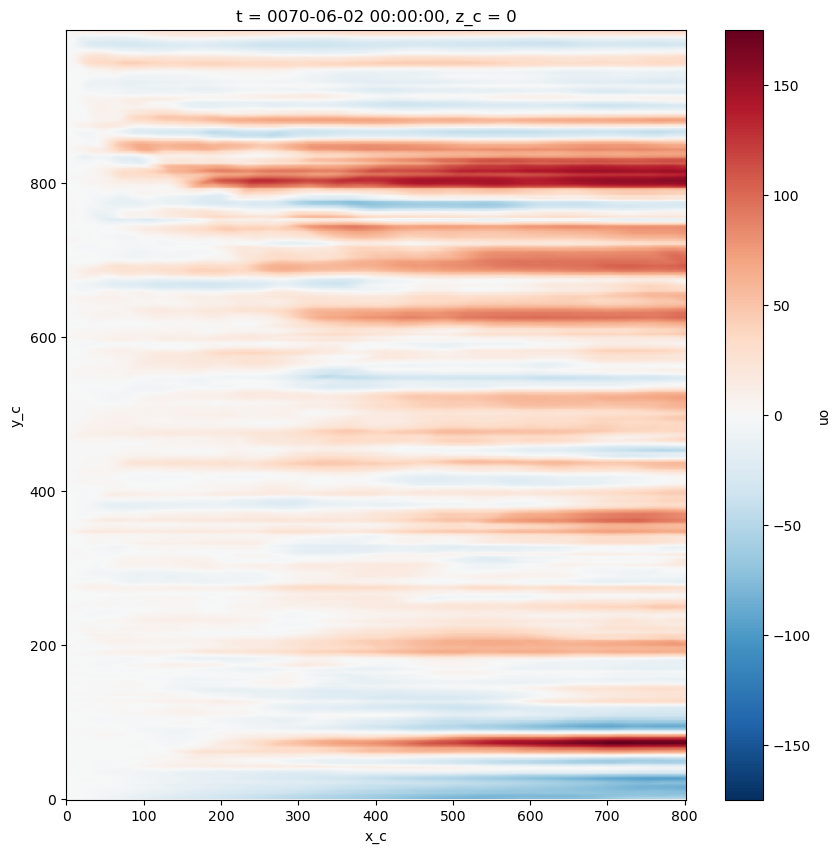

In [7]:
psi.isel(t=0,z_c=0, y_c=slice(0, 1000)).plot.pcolormesh(figsize=(10,10)) #figsize=(5,10)

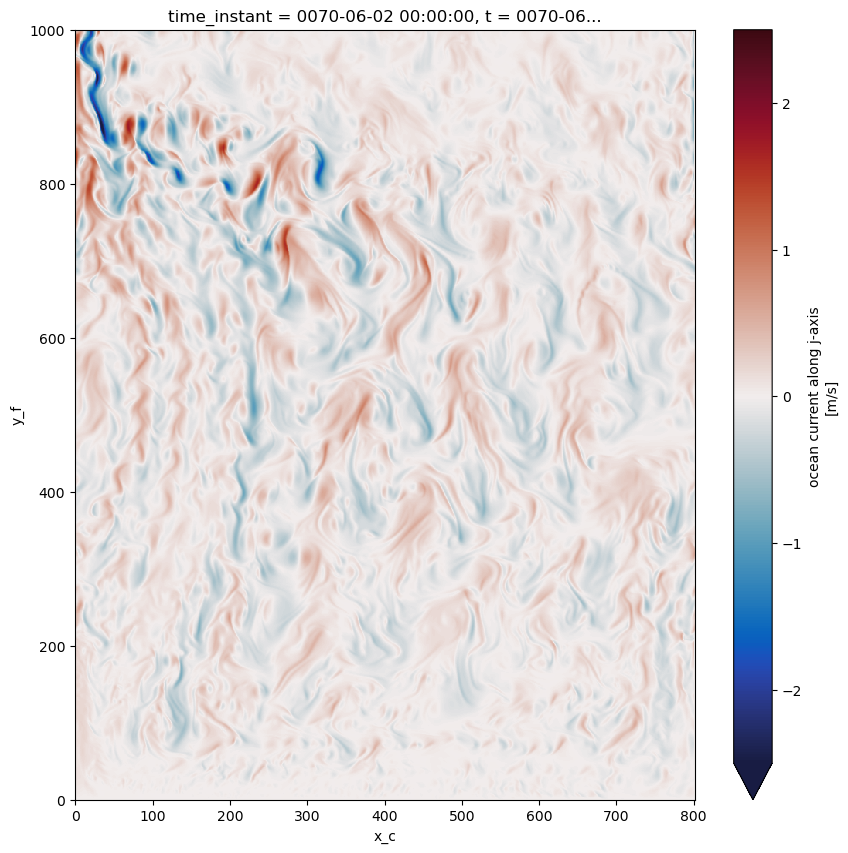

In [27]:
ds.vo.isel(t=0,z_c=0, y_f=slice(0, 1000)).plot(figsize=(10,10), vmin=-2.5, vmax=2.5, cmap=cmocean.cm.balance)